In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing


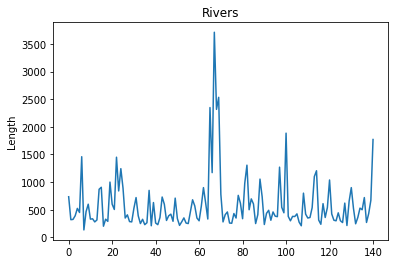

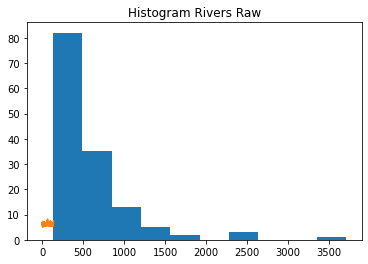

In [61]:
rivers = [735, 320, 325, 392, 524, 450, 1459, 135, 465, 600, 330, 336,
          280, 315, 870, 906, 202, 329, 290, 1000, 600, 505, 1450,
          840, 1243, 890, 350, 407, 286, 280, 525, 720, 390, 250, 
          327, 230, 265, 850, 210, 630, 260, 230, 360, 730, 600, 
          306, 390, 420, 291, 710, 340, 217, 281, 352, 259, 250, 
          470, 680, 570, 350, 300, 560, 900, 625, 332, 2348, 1171, 
          3710, 2315, 2533, 780, 280, 410, 460, 260, 255, 431, 350, 
          760, 618, 338, 981, 1306, 500, 696, 605, 250, 411, 1054, 735, 
          233, 435, 490, 310, 460, 383, 375, 1270, 545, 445, 1885, 380, 
          300, 380, 377, 425, 276, 210, 800, 420, 350, 360, 538, 1100,
          1205, 314, 237, 610, 360, 540, 1038, 424, 310, 300, 444, 301, 
          268, 620, 215, 652, 900, 525, 246, 360, 529, 500, 720, 270, 
          430, 671, 1770]

### plot raw data

plt.plot(rivers)
plt.title('Rivers')
plt.ylabel('Length')
plt.show()

plt.hist(rivers)
plt.title('Histogram Rivers Raw')

### transform the data
log_transform_river= np.log(rivers)
plt.plot(log_transform_river)


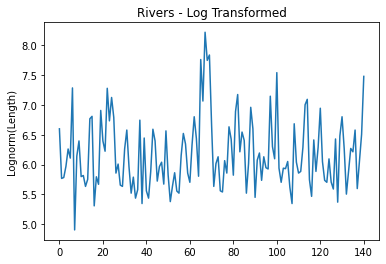

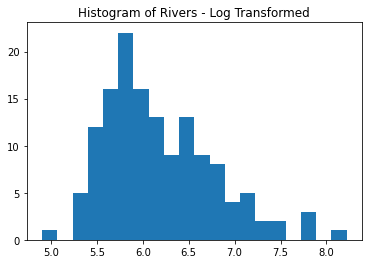

In [63]:
tranf_log_river = np.log(rivers)
plt.plot(tranf_log_river)
plt.title('Rivers - Log Transformed')
plt.ylabel('Lognorm(Length)')
plt.show()

plt.hist(tranf_log_river, bins = 20)
plt.title('Histogram of Rivers - Log Transformed')
plt.show()

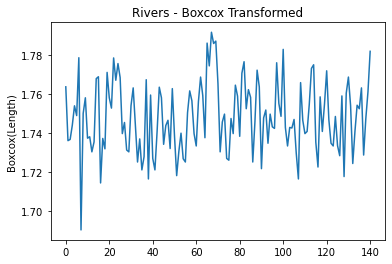

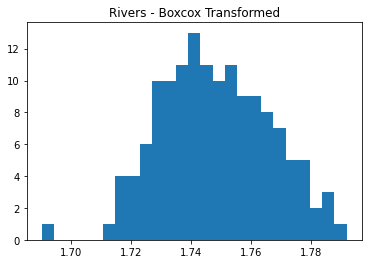

In [64]:
transf_boxcox_rivers = stats.boxcox(rivers)
plt.plot(transf_boxcox_rivers[0])
plt.title('Rivers - Boxcox Transformed')
plt.ylabel('Boxcox(Length)')

plt.show()

plt.hist(transf_boxcox_rivers[0], bins = 25)
plt.title('Rivers - Boxcox Transformed')
plt.show()

Response: 

I applied log and boxcox transformation on the river data. Using both the stats class from the scipy module and the numpy module.

Results: 

The resulting transformed rivers dataset is more normalized as shown by the histograms. (No longer skewed to the right as much. Centered with a single peak.)


In [5]:
from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['Target_Categorical'] = pd.DataFrame(iris.target)
#display(iris_df.head(5))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target_Categorical
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [65]:
iris_target = iris.target_names
iris_encoding = pd.get_dummies(iris_target)
display(iris_encoding)


,setosa,versicolor,virginica
0,1,0,0
1,0,1,0
2,0,0,1


# 3.	Perform the following Text Mining steps.

Nature Articles: 

I am getting two articles on mental health and two articles on ukraine because there's not many sentences in each article. Hoping this would improve training on the Machine Learning Algorithm

**Mental Health vs Ukraine**

* Mental_Health1 = https://www.nature.com/articles/d41586-021-02690-5

* Mental_Health2 = https://www.nature.com/articles/s41559-022-01707-0

* Ukraine1 = https://www.nature.com/articles/d41591-022-00045-9

* Ukraine2 = https://www.nature.com/articles/d41586-022-00647-w

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from bs4.element import Comment

In [8]:
urls = {'Mental_Health1':'https://www.nature.com/articles/d41586-021-02690-5',
        'Mental_Health2': 'https://www.nature.com/articles/s41559-022-01707-0',
        'Ukraine1': 'https://www.nature.com/articles/d41591-022-00045-9',
        'Ukraine2': 'https://www.nature.com/articles/d41586-022-00647-w'}
#response = requests.get(url)

https://stackoverflow.com/questions/1936466/beautifulsoup-grab-visible-webpage-text

In [9]:


def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True


def text_from_html(url_text):
    response = requests.get(url_text)
    soup = BeautifulSoup(response.text, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)



In [10]:
def get_texts(list_urls):
    articles = {}
    for key in list_urls:
        print(key)
        print(list_urls.get(key))
        articles[key] = text_from_html(list_urls.get(key))
    return articles

data = get_texts(urls)


Mental_Health1
https://www.nature.com/articles/d41586-021-02690-5
Mental_Health2
https://www.nature.com/articles/s41559-022-01707-0
Ukraine1
https://www.nature.com/articles/d41591-022-00045-9
Ukraine2
https://www.nature.com/articles/d41586-022-00647-w


In [11]:
#text cleaning - remove unnessary words that's not part of the article: 


# Article1 - mental health
mentalhealth_texts = data.get('Mental_Health1').split('Worldwide, at least 13%')[1].split('facing more challenges than ever before.')[0]
Mental_Health1 = 'Worldwide, at least 13%' + mentalhealth_texts + 'facing more challenges than ever before.'
data['Mental_Health1'] = Mental_Health1 

# Article2 - mental health
mentalhealth_texts = data.get('Mental_Health2').split('In late 2021,')[1].split('together we can make progress in reducing their impact.')[0]
Mental_Health2 = 'In late 2021,' + mentalhealth_texts + 'together we can make progress in reducing their impact.'
data['Mental_Health2'] = Mental_Health2

#Article3 - ukraine
data.get('Ukraine1') 
Ukraine_text = data.get('Ukraine1').split('On 9 March 2022,')[1].split('implement strategies learned from armed conflicts elsewhere.')[0]
Ukraine1 = 'On 9 March 2022,' + Ukraine_text + 'implement strategies learned from armed conflicts elsewhere.'
data['Ukraine1'] = Ukraine1 

#Article4 - ukraine
data.get('Ukraine2') 
Ukraine_text = data.get('Ukraine2').split('Attacks on civilian infrastructure,')[1].split('to Russia’s aggression.')[0]
Ukraine2 = 'Attacks on civilian infrastructure,' + Ukraine_text + 'to Russia’s aggression.'
data['Ukraine2'] = Ukraine2 


In [12]:
news_corpus = {}

# combinding article 1 and article 2 on mental health into one corpus

text_mentalhealth = data.get('Mental_Health1') + data.get('Mental_Health2')
news_corpus['text_mentalhealth'] = text_mentalhealth

#combinding article 3 and article 4 on ukraine into another corpus
text_ukraine = data.get('Ukraine1') + data.get('Ukraine2')
news_corpus['text_ukraine'] = text_ukraine


In [13]:
pd.DataFrame(news_corpus, index = ['documents'])

,text_mentalhealth,text_ukraine
documents,"Worldwide, at least 13% of people between the ...","On 9 March 2022, a maternity and children’s ho..."


In [14]:
news_corpus.get('text_mentalhealth')[:1000]

'Worldwide, at least 13% of people between the ages of 10 and 19 live with a diagnosed mental-health disorder, according to the latest State of the World’s Children report , published this week by the United Nations children’s charity UNICEF. It’s the first time in the organization’s history that this flagship report has tackled the challenges in and opportunities for preventing and treating mental-health problems among young people. It reveals that adolescent mental health is highly complex, understudied — and underfunded. These findings are echoed in a parallel collection of review articles published this week in a number of Springer Nature journals. Anxiety and depression constitute more than 40% of mental-health disorders among young people (those aged 10–19). UNICEF also reports that, worldwide, suicide is the fourth most-common cause of death (after road injuries, tuberculosis and interpersonal violence) among adolescents (aged 15–19). In eastern Europe and central Asia, suicide 

In [15]:
news_corpus.get('text_ukraine')[:1000]

'On 9 March 2022, a maternity and children’s hospital in Mariupol, Ukraine, was bombed; one of several health facilities targeted in violation of international humanitarian law. Attacking civilian hospitals is reprehensible and generates an immediate and emotive response from the global community. But, for the humanitarian health community, zeroing in on every such act will result in responses that are generally ineffective and rarely sustainable.        Image credit: Annette Etges    The world’s attention is on the tragic situation of Ukrainian refugees, who are being assisted by neighboring countries. Yet, it is the internally displaced, and residents who remain, who pay the highest price in armed conflicts. Often under siege, cut off from external aid and living in constant fear, those who remain present worst health status indicators than refugees. The humanitarian community responding to this crisis urgently needs a coordinated health assistance plan for the long term, drawing on 

# b.	(2 points) 
Write the vector of text to a file and upload it with the rest of your code. Provide code in your assignment that reads this file back in.

i.	The purpose for this is to allow your facilitator to grade your assignment using the same text that you had (Twitter searches and online scrapes can provide different data to your facilitator as new content is added after you write your code but before your code is graded).


***Answer:***

For this part, I am using the json library to dump my news_corpus object into a file I named "news.json". This is because the news_corpus is a json object. The keys are MentalHealth and Ukraine. The values are the respective documents for each key. 

Then I use json module to load the data into my workspace by using json.load(news.txt) and saving this to a variable call "text_corpus". 

In [16]:
# Writing to file
import json
filepath = 'news.json'

with open(filepath, 'w') as f:
    json.dump(news_corpus, f)
    



In [17]:
# Reading file back
with open(filepath) as g:
    text_corpus = json.load(g)

In [18]:
text_corpus.keys()
# key - value pair 


dict_keys(['text_mentalhealth', 'text_ukraine'])

In [66]:
#text_corpus.get('text_mentalhealth')

downloading nltk packages with the following code from directions here: 
https://github.com/gunthercox/ChatterBot/issues/930#issuecomment-322111087

In [20]:
# # I have to run the following code in order to allow nltk to download.
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()

In [21]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
import nltk.data # https://www.nltk.org/_modules/nltk/tokenize/punkt.html

### Step 1: Divide Articles into sentences

In [22]:
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
def split_article_to_sent(article):
    # remove extra white spaces with .strip()
    # pass result into the tokenize method in the sent_dector class
     return sent_detector.tokenize(article.strip())
        

### Step 2: Preprocessing

1. tokenize sentences into words
2. remove stopwords
3. remove punctuations - see if there's a difference in ml if we keep/remove punctuations
4. lowercase
5. apply stemming
6. parts_of_speech_tagging

In [23]:
# Writing a function to clean the data the sentences:

stop_words = set(stopwords.words('english'))

word_tokenize_nopunct = RegexpTokenizer(r'\w+').tokenize

ps = PorterStemmer()

def clean_text(article):
    cleaned_article = []
    for sent in article:
        word_token =word_tokenize_nopunct(sent)
        build_back_sentence = []
        for word in word_token:
            if len(word) <= 2:
                if not word.isnumeric() :
                    word = ''
            if word.lower() in stop_words:
                word = ''
            word = ps.stem(word)
            
            build_back_sentence.append(word)
        while("" in build_back_sentence):
            try:
                build_back_sentence.remove("")
            except:
                pass
        sentence = ' '.join(build_back_sentence)
        cleaned_article.append(sentence) 
    return cleaned_article
            

In [24]:
splitted_mh = split_article_to_sent(text_corpus.get('text_mentalhealth'))
cleaned_mh = clean_text(splitted_mh)


In [25]:
splitted_uk = split_article_to_sent(text_corpus.get('text_ukraine'))
cleaned_uk = clean_text(splitted_uk)


In [26]:
#creating tags
tags = ['mental_health'] * len(cleaned_mh)
tags2 = ['text_ukraine']*len(cleaned_uk)
tags.extend(tags2)

In [27]:
#appending the two documents
cleaned_mh.extend(cleaned_uk)
news_corpus = cleaned_mh

In [28]:
news_corpus_df = pd.DataFrame(list(zip(tags, news_corpus)), columns = ['tag','article_sentence'])
display(news_corpus_df.head(5))
display(news_corpus_df.tail(5))

,tag,article_sentence
0,mental_health,worldwid least 13 peopl age 10 19 live diagnos...
1,mental_health,first time organ histori flagship report tackl...
2,mental_health,reveal adolesc mental health highli complex un...
3,mental_health,find echo parallel collect review articl publi...
4,mental_health,anxieti depress constitut 40 mental health dis...


,tag,article_sentence
148,text_ukraine,world must keep gener knowledg need deal crise
149,text_ukraine,abil commun research scholarship freeli across...
150,text_ukraine,gya also rightli call research commun uphold s...
151,text_ukraine,statement invas interacademi partnership netwo...
152,text_ukraine,whole scientif commun includ natur must stand ...


Answer: 

I performed text preprocessing using the functions and packages to achieve.... x x x.

### d.	(5 points)
Create a Document-Term Matrix. Use tf-idf weighting.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [30]:
doc_vec = vectorizer.fit_transform(news_corpus)
dtm = pd.DataFrame(doc_vec.toarray(), columns = vectorizer.get_feature_names())
dtm

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,000,10,12,13,14,15,17,18,19,2005,...,would,written,www,year,yemen,yet,young,youth,zero,zone
0,0.0,0.216842,0.0,0.20421,0.0,0.0,0.0,0.0,0.194412,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.180518,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.347971,0.0,0.00000,0.0,0.0,0.0,0.0,0.311976,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.217908,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
149,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
150,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
151,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### e.	(30 points) Classify and display results. This will require you to:

##### i.	Split the Document-Term Matrix into a train DTM and a test DTM.

In [31]:
dtm.insert(0,'tag_target', tags)
dtm

,tag_target,000,10,12,13,14,15,17,18,19,...,would,written,www,year,yemen,yet,young,youth,zero,zone
0,mental_health,0.0,0.216842,0.0,0.20421,0.0,0.0,0.0,0.0,0.194412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,mental_health,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.180518,0.0,0.0,0.0
2,mental_health,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,mental_health,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,mental_health,0.0,0.347971,0.0,0.00000,0.0,0.0,0.0,0.0,0.311976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.217908,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,text_ukraine,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
149,text_ukraine,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
150,text_ukraine,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
151,text_ukraine,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


Using sklearn.train_test_split, I'll create a 80%/20% split. 80% for training and testing on 20% of the sentences.

> rows 0 - 82 are mental_health

> rows 83 - 152 are ukraine

In [32]:
import numpy as np
from sklearn.model_selection import train_test_split

In [33]:
X = dtm.iloc[:,1:]
X_mh = X.iloc[:83, :]
X_ukraine = X.iloc[83:, :]

In [34]:
y =dtm.iloc[:,0]
y_mh = y.iloc[:83]
y_ukraine = y.iloc[83:]


In [35]:
X_train_mh, X_test_mh, y_train_mh, y_test_mh = train_test_split(
                                    X_mh, y_mh, test_size = 0.2, random_state = 12345)

In [36]:
X_train_ukraine, X_test_ukraine, y_train_ukraine, y_test_ukraine = train_test_split(
                                    X_ukraine, y_ukraine, test_size = 0.2, random_state = 12345)

In [37]:
dtm_train = X_train_mh.append(X_train_ukraine)
dtm_train_target = y_train_mh.append(y_train_ukraine)

dtm_test = X_test_mh.append(X_test_ukraine)
dtm_test_target = y_test_mh.append(y_test_ukraine)

In [67]:
display(dtm_train.head(3))
print(np.array(dtm_train_target))

,000,10,12,13,14,15,17,18,19,2005,...,would,written,www,year,yemen,yet,young,youth,zero,zone
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.159406,0.0,0.0,0.0
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


['mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_

In [39]:
display(dtm_test.head(5))
print(np.array(dtm_test_target))

,000,10,12,13,14,15,17,18,19,2005,...,would,written,www,year,yemen,yet,young,youth,zero,zone
46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.340814
35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.164573,0.0,0.0,0.000000
66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.135013,0.0,0.0,0.000000


['mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'mental_health' 'mental_health' 'mental_health'
 'mental_health' 'text_ukraine' 'text_ukraine' 'text_ukraine'
 'text_ukraine' 'text_ukraine' 'text_ukraine' 'text_ukraine'
 'text_ukraine' 'text_ukraine' 'text_ukraine' 'text_ukraine'
 'text_ukraine' 'text_ukraine' 'text_ukraine']


##### ii.	Use the train DTM and the train target to train the classifier.

Appoarch: 

Using, `sklearn.neighbors import KNeighborsClassifier`  knn classifier for this portion to predict news article sentences. 


* for metrics, I'm setting `pos_label = 'Mental_Health'`


**Step 1:** 

* First I will be applying KNN classifier **without tunning the parameters**, so only default hyperparameters will be applied. I will apply `clf_knn.predict` on `dtm_test` and compare the predictions with the test target. 
    * I will display the test target, the corresponding prediction, and indicate whether the prediciton is accurate. 
    * Then, I will generate the classification_report and measure the classifier's performance. 


**Step 2:** 

* Then I will tackle **hyperparameters tunning** by creating a permuation of sets of values for the hyperparameters. I will iterate through these sets in a function and calculate the the classifier's performance. 
    * I will provide a visualization and identify the optimal set of parameters recommended for this model. 


***

##### Step 1

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics

In [41]:
clf_knn = KNeighborsClassifier().fit(dtm_train,dtm_train_target)
clf_knn

KNeighborsClassifier()

##### iv.	Predict the test classification using the test DTM.

In [42]:
dtm_predict = clf_knn.predict(dtm_test)
dtm_predict

array(['mental_health', 'mental_health', 'text_ukraine', 'mental_health',
       'mental_health', 'mental_health', 'mental_health', 'mental_health',
       'mental_health', 'mental_health', 'mental_health', 'text_ukraine',
       'mental_health', 'mental_health', 'mental_health', 'mental_health',
       'text_ukraine', 'text_ukraine', 'text_ukraine', 'text_ukraine',
       'text_ukraine', 'text_ukraine', 'text_ukraine', 'text_ukraine',
       'text_ukraine', 'text_ukraine', 'text_ukraine', 'text_ukraine',
       'text_ukraine', 'text_ukraine', 'mental_health'], dtype=object)

##### v.	Compare the predictions with the test target.

##### vi.	For each document in the test data set, display the test target, the corresponding prediction, and some indication of whether the prediction is accurate.

In [43]:
rest_df = {'Pred': dtm_predict, 'Target_Tag': dtm_test_target, 'CorrectClass': dtm_predict == dtm_test_target}
pd.DataFrame(rest_df, columns = ['Pred','Target_Tag', 'CorrectClass'])

,Pred,Target_Tag,CorrectClass
46,mental_health,mental_health,True
35,mental_health,mental_health,True
66,text_ukraine,mental_health,False
58,mental_health,mental_health,True
39,mental_health,mental_health,True
44,mental_health,mental_health,True
4,mental_health,mental_health,True
26,mental_health,mental_health,True
76,mental_health,mental_health,True
2,mental_health,mental_health,True


##### vii.	Measure the classifier’s performance.

In [44]:
print(classification_report(dtm_predict, dtm_test_target))

               precision    recall  f1-score   support

mental_health       0.82      0.93      0.87        15
 text_ukraine       0.93      0.81      0.87        16

     accuracy                           0.87        31
    macro avg       0.88      0.87      0.87        31
 weighted avg       0.88      0.87      0.87        31



In [45]:
# Evaluate KNN + Confusing Matrix

print('Accuracy:', metrics.accuracy_score(dtm_test_target, dtm_predict))
print('Precision:', metrics.precision_score(dtm_test_target, dtm_predict, pos_label = 'mental_health'))
print('Recall:', metrics.recall_score(dtm_test_target, dtm_predict, pos_label = 'mental_health'))
print('F Score:', metrics.f1_score(dtm_test_target, dtm_predict, pos_label = 'mental_health'))
print('Confusion Matrix: \n', metrics.confusion_matrix(dtm_test_target, dtm_predict) )

Accuracy: 0.8709677419354839
Precision: 0.9333333333333333
Recall: 0.8235294117647058
F Score: 0.8749999999999999
Confusion Matrix: 
 [[14  3]
 [ 1 13]]


***

##### Step 2

Now, I will try to optimize my model performing hyperparameter tunning.  

##### iii.	Tune hyperparameters (as you did in Assignment 2).

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

1. number of neighbors to use : n_neighbors


2. weights{‘uniform’, ‘distance’}
    * uniform means all the neighbors have equal weights while distance means those closer have higher influence


3. algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’ 
    * algorithm used to compute the nearest neightbor
    
    
4. leaf_size - int, default=30
    * Leaf size passed to BallTree or KDTree.
    
    
5. p default=2
    * p =1 is the manhatten_distance
    * p =2 is the eculidean_distance
    
    
I'm selecting the possible combination to tune my knn classifier and testing if I can find an optimal set of hyperparameters


`tunning = {'neighbors': [2, 3, 5], 'weights': ['uniform', 'distance'], 'p': [1,2]}`

In [46]:
neighbors = [2, 3, 4, 5, 6, 7]
weights = ['uniform', 'distance']
p = [1,2]
algor = ['auto', 'ball_tree', 'kd_tree', 'brute']

In [47]:
import itertools
from itertools import product

In [69]:
perm = list(itertools.product(neighbors, weights))
perm = list(itertools.product(perm, p))
perm = list(itertools.product(perm, algor))
perm[:5]
#list(itertools.product(list_1, list_2))

[(((2, 'uniform'), 0.5483870967741935), 'auto'),
 (((2, 'uniform'), 0.5483870967741935), 'ball_tree'),
 (((2, 'uniform'), 0.5483870967741935), 'kd_tree')]

In [49]:
len(perm)

96

In [50]:
def tune_param_score(perm, X_train, y_train, X_test, y_test):
    list_knn_classifier = []
    predict = []
    to_graph = []
    for i in perm:
        n = i[0][0][0]
        w = i[0][0][1]
        pdist = i[0][1]
        algor = i[1]
        clf_knn = KNeighborsClassifier(n_neighbors= n, weights = w, p= pdist, algorithm =algor ).fit(X_train, y_train)
        dtm_predict = clf_knn.predict(X_test)
        accuracy_i = metrics.accuracy_score(y_test, dtm_predict)
        precision_i = metrics.precision_score(y_test, dtm_predict,  pos_label = 'mental_health')
        recall_i = metrics.recall_score(y_test, dtm_predict, pos_label = 'mental_health')
        f_score = metrics.f1_score(y_test, dtm_predict, pos_label = 'mental_health')
        list_knn_classifier.append(i)
        predict.append(dtm_predict)
        to_graph.append([accuracy_i, precision_i, recall_i, f_score])
    return list_knn_classifier, predict, to_graph

# clf_knn = KNeighborsClassifier().fit(dtm_train,dtm_train_target)
# clf_knn

In [51]:
params, predictions, to_graph = tune_param_score(perm, dtm_train, dtm_train_target, dtm_test, dtm_test_target)

In [70]:
print(predictions[5:6])

[array(['mental_health', 'mental_health', 'mental_health', 'mental_health',
       'mental_health', 'mental_health', 'mental_health', 'mental_health',
       'mental_health', 'mental_health', 'mental_health', 'text_ukraine',
       'mental_health', 'mental_health', 'mental_health', 'mental_health',
       'mental_health', 'mental_health', 'text_ukraine', 'mental_health',
       'text_ukraine', 'mental_health', 'text_ukraine', 'text_ukraine',
       'mental_health', 'text_ukraine', 'text_ukraine', 'text_ukraine',
       'text_ukraine', 'text_ukraine', 'mental_health'], dtype=object)]


In [53]:
knn_metrics = pd.DataFrame(to_graph, columns = ['Accuracy', 'Precision', 'Recall', 'F_Score'])

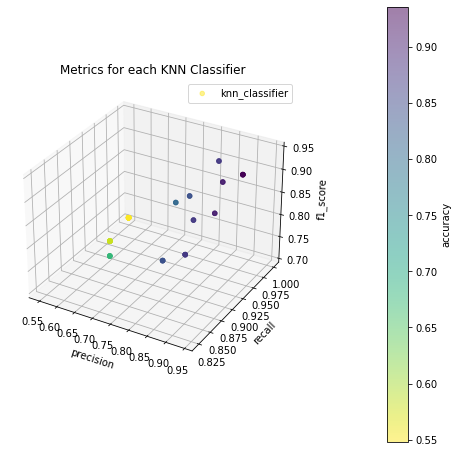

In [54]:
a = knn_metrics.Accuracy
p = knn_metrics.Precision
r = knn_metrics.Recall
f = knn_metrics.F_Score

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(111, projection = '3d')
img = ax.scatter(p, r, f, c=a, cmap='viridis_r', label = 'knn_classifier', alpha = 0.5)

ax.legend()
ax.set_title('Metrics for each KNN Classifier')
ax.set_xlabel('precision')
ax.set_ylabel('recall')
ax.set_zlabel('f1_score')
fig.colorbar(img, pad = 0.2, label = 'accuracy')

plt.show()

In [55]:
display(knn_metrics.drop_duplicates())

,Accuracy,Precision,Recall,F_Score
0,0.548387,0.548387,1.000000,0.708333
4,0.806452,0.761905,0.941176,0.842105
12,0.838710,0.800000,0.941176,0.864865
20,0.935484,0.941176,0.941176,0.941176
36,0.870968,0.809524,1.000000,0.894737
44,0.903226,0.888889,0.941176,0.914286
48,0.677419,0.652174,0.882353,0.750000
52,0.870968,0.933333,0.823529,0.875000
64,0.580645,0.571429,0.941176,0.711111
68,0.870968,0.882353,0.882353,0.882353


In [56]:
perm[20]

(((3, 'uniform'), 2), 'auto')

In [57]:
optimal_df = {'Pred': predictions[20], 'Target_Tag': dtm_test_target, 'CorrectClass': predictions[20] == dtm_test_target}
pd.DataFrame(optimal_df, columns = ['Pred','Target_Tag', 'CorrectClass'])

,Pred,Target_Tag,CorrectClass
46,mental_health,mental_health,True
35,mental_health,mental_health,True
66,mental_health,mental_health,True
58,mental_health,mental_health,True
39,mental_health,mental_health,True
44,mental_health,mental_health,True
4,mental_health,mental_health,True
26,mental_health,mental_health,True
76,mental_health,mental_health,True
2,mental_health,mental_health,True


I have tried 96 different permuations of hyperparameters for knn classifier. Only 12 unique combination of metrics were returned as shown in the 3D-Graph and the dataframe after dropping duplicates. 

Based on these results. Index 20 looks the best. 

------------------------------------------------

    
    Accuracy	|Precision	|Recall	    |F_Score
	0.935484	|0.941176	|0.941176	|0.941176



These results came from the set of hyperparameter: 
1. `n_neighbors = 3` ( the closest 4 points)
2. `weights = 'uniform'` (all neighbor points have equal weights in predicting the target)
3. `p = 2` (the eculidean_distance)
4. `algorithm = 'auto'` (default algorithm - ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.)
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

##### viii.	Determine whether adjustments might improve the classifier’s performance. For example, you might change hyperparameters or the pre-processing steps that generate the features of the DTM.

Testing different sets of parameters for the knn classifier definitely improved the performance of the classifier across all metrics. 

1. Default values - without hyperparameter tuning:
    * Accuracy: 0.8709677419354839
    * Precision: 0.9333333333333333
    * Recall: 0.8235294117647058
    * F Score: 0.8749999999999999
    
    
2. With tuning hyperparameters:
    * Accuracy: 0.935484
    * Precision: 0.941176 
    * Recall: 0.941176
    * F_Score: 0.941176
    
    
I might be able to further improve the classifier's performance by 1. feeding my knn classifier more news article sentences or 2. test different preprocessing steps such as removing stemming and keeping punctuations. 

Overall, I think my classification algorithm has good performance in terms of accuracy and optimization. Reaching above 90% in all metrics category, and it only takes a few seconds to run. 

I reached my conclusion by tagging the news articles I pulled from **Nature**. I splitted the articles into sentences, tagged them respectively as either "Mental_Health" or "Ukraine". Then I tokenized the sentences and applied pre-processing text cleaning such as removing punctuations, converting to lowercase, apply stemming, removing stopwords, etc. Next, I split my corpus into training and testing sets (80/20 split). Finally, I applied KNN classifier with default parameters from sklearn package on my data. 

To improve my model, I tested different sets of hyperparameters and found an the optimal set of hyperparameters which gave me high accuracy and good performance. 